In [0]:
!pip install face_recognition

In [0]:
import pandas as pd
face_df = pd.read_csv("face.csv")
face_df

In [11]:
encodings = []
for e in face_df["Encoding"]:
    encodings.append(np.array(eval(e)))
encodings = np.array(encodings)
labels = np.array(face_df["Name"])
labels

array(['林俊傑', '周杰倫', '新垣結衣', '阿信', '長澤雅美', '林志玲'], dtype=object)

請輸入網址:http://i01.istayreal.com/inner/2014-09-26/65957b9fe369f7697051c4d52476ce02.jpg
跟 林俊傑 的距離: 0.5364962007847139
跟 周杰倫 的距離: 0.5678981033966902
跟 新垣結衣 的距離: 0.6327053293692658
跟 阿信 的距離: 0.49084909763672385
跟 長澤雅美 的距離: 0.5647116457595822
跟 林志玲 的距離: 0.7045373428654561
這個應該是: 阿信


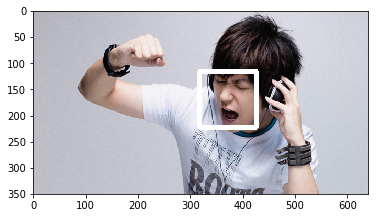

In [52]:
import requests
from PIL import Image
import numpy as np
import face_recognition
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import math

url = input("請輸入網址:")
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).convert("RGB")
img_np = np.array(img)
# face_recog
single_en = face_recognition.face_encodings(img_np)
single_loc = face_recognition.face_locations(img_np)

if len(single_en) == 0:
    print("沒有辨識到任何的臉")
elif len(single_en) > 1:
    print("不支援多臉辨識")
else:
    distance = face_recognition.face_distance(encodings, single_en[0])
    for l, d in zip(labels, distance):
        print("跟", l, "的距離:", d)
    if min(distance) < 0.5:
        idx = distance.argmin()
        print("這個應該是:", labels[idx])
    else:
        print("沒有辨識到!!!")
    (top, right, bottom, left) = single_loc[0]
    result = cv2.rectangle(img_np, 
                           (left, top), 
                           (right, bottom), 
                           (255, 255, 255), 
                           math.ceil(img.size[0] / 100))
    plt.imshow(result)

In [35]:
img.size

(220, 217)